In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
model = SentenceTransformer('intfloat/multilingual-e5-large-instruct')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

In [ ]:
docs = ['tender','partner','think','come','benchmark','accuse','year','fact','draw','group','reinveste','violence','chief','nation','matter','concession','submit','datum','afghan','kill','below','suspect','currency','trail','stay','new','kenyan','diplomatic','journalist','decrease','more','university','nse','club','soon','ever','defense','country','equal','proceeding','world','natural','resolution','twice','really','client','recovery','regulation','vol','retain','distribution','retail','demand','design','try','much','extensive','ep','method','control','republic','publication','comment','rating','late','feature','land','analyst','home','approach','bank','favorably','shall','know','next','authority','produce','purchase','progress','negative','pandemic','arrive','understand','out','mitte','airport','bullish','stock','growth','provincial','text','past']

In [ ]:
embeddings = model.encode(docs, convert_to_tensor=True, normalize_embeddings=True)
print(embeddings)

tensor([[ 0.0218,  0.0377, -0.0012,  ..., -0.0544, -0.0544,  0.0320],
        [ 0.0307,  0.0233, -0.0120,  ..., -0.0093, -0.0387,  0.0375],
        [ 0.0087,  0.0277,  0.0029,  ..., -0.0271, -0.0338,  0.0264],
        ...,
        [ 0.0024,  0.0369, -0.0075,  ..., -0.0096, -0.0272,  0.0366],
        [ 0.0173,  0.0428, -0.0041,  ...,  0.0013, -0.0243,  0.0381],
        [ 0.0312,  0.0469, -0.0180,  ...,  0.0043, -0.0511, -0.0129]],
       device='cuda:0')


In [ ]:
# prompt: Using docs and embeddings, apply Kmean clustering to find the ideal amount of clusters

from sklearn.cluster import KMeans

# # Determine the ideal number of clusters using the elbow method
# inertia = []
# for i in range(1, 11):
#     km = KMeans(n_clusters=i, random_state=0)
#     km.fit(embeddings.cpu().numpy())
#     inertia.append(km.inertia_)

# # Plot the elbow curve
# import matplotlib.pyplot as plt

# plt.plot(range(1, 11), inertia)
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

# Choose the number of clusters based on the elbow curve
num_clusters = 3

# Perform K-means clustering with the chosen number of clusters
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(embeddings.cpu().numpy())

# Print the cluster labels
print(km.labels_)


[1 1 0 0 1 0 2 0 0 2 1 2 2 2 0 1 0 0 2 0 0 0 1 0 0 1 2 2 2 1 1 2 0 2 0 0 1
 2 0 0 2 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 2 0 0 1 0 0 2 0 2 0 1 1 0 0
 0 0 2 1 0 1 2 0 0 0 0 2 1 1 1 2 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
non_peace_ls = ['kill','afghan','tender','nation','concession','matter','fact','accuse','violence','draw','suspect','submit','proceeding','defense','ever','soon','club','nse','university','journalist','diplomatic','kenyan','progress','publication','provincial','mitte','airport','pandemic','understand','arrive','text','land','country','come','demand','authority','know','try','think','world','much','new','more','home','stay','next','group','bank','approach','partner','shall','produce','control','regulation','republic','late','really']
peace_ls = ['chief','recovery','out','design','equal','datum','negative','below','currency','trail','reinveste','growth','decrease','bullish','past','year','stock','benchmark','resolution','natural','feature','analyst','favorably','twice','client','distribution','retail','extensive','method','ep','retain','vol','comment','purchase','rating']

In [ ]:
# prompt: Please create a dictionary where the unique value of the clusters is the key and the corresponding word in the doc is the value

cluster_dict = {}
for i, label in enumerate(km.labels_):
  if label not in cluster_dict:
    cluster_dict[label] = []
  cluster_dict[label].append(docs[i])

print(cluster_dict)


{1: ['tender', 'partner', 'benchmark', 'reinveste', 'concession', 'currency', 'new', 'decrease', 'more', 'defense', 'recovery', 'regulation', 'retain', 'distribution', 'retail', 'demand', 'rating', 'bank', 'favorably', 'purchase', 'negative', 'bullish', 'stock', 'growth'], 0: ['think', 'come', 'accuse', 'fact', 'draw', 'matter', 'submit', 'datum', 'kill', 'below', 'suspect', 'trail', 'stay', 'nse', 'soon', 'ever', 'equal', 'proceeding', 'natural', 'resolution', 'twice', 'really', 'client', 'vol', 'design', 'try', 'much', 'extensive', 'ep', 'method', 'control', 'publication', 'comment', 'late', 'feature', 'analyst', 'approach', 'shall', 'know', 'next', 'authority', 'progress', 'arrive', 'understand', 'out', 'mitte', 'text', 'past'], 2: ['year', 'group', 'violence', 'chief', 'nation', 'afghan', 'kenyan', 'diplomatic', 'journalist', 'university', 'club', 'country', 'world', 'republic', 'land', 'home', 'produce', 'pandemic', 'airport', 'provincial']}


In [ ]:
', '.join([i for i in cluster_dict[1] if i in peace_ls])
# ', '.join([i for i in cluster_dict[2] if i in non_peace_ls])
# (len([i for i in cluster_dict[0] if i in peace_ls])/len(peace_ls))/(len([i for i in cluster_dict[0] if i in non_peace_ls])/len(non_peace_ls))

'benchmark, reinveste, currency, decrease, recovery, retain, distribution, retail, rating, favorably, purchase, negative, bullish, stock, growth'

In [ ]:
', '.join([i for i in cluster_dict[2] if i in non_peace_ls])

'group, violence, nation, afghan, kenyan, diplomatic, journalist, university, club, country, world, republic, land, home, produce, pandemic, airport, provincial'

In [ ]:
(len([i for i in cluster_dict[0] if i in peace_ls])/len(peace_ls))/(len([i for i in cluster_dict[0] if i in non_peace_ls])/len(non_peace_ls))

0.9771428571428571

In [ ]:
', '.join([i for i in cluster_dict[0] if i in non_peace_ls])

In [ ]:
def classify_word(word, cluster_dict):
  for label, cluster in cluster_dict.items():
    if word in cluster:
      if label == 0:
        return 'o'
      elif label == 1:
        return 'v'
      elif label == 2:
        return 'x'
  return None


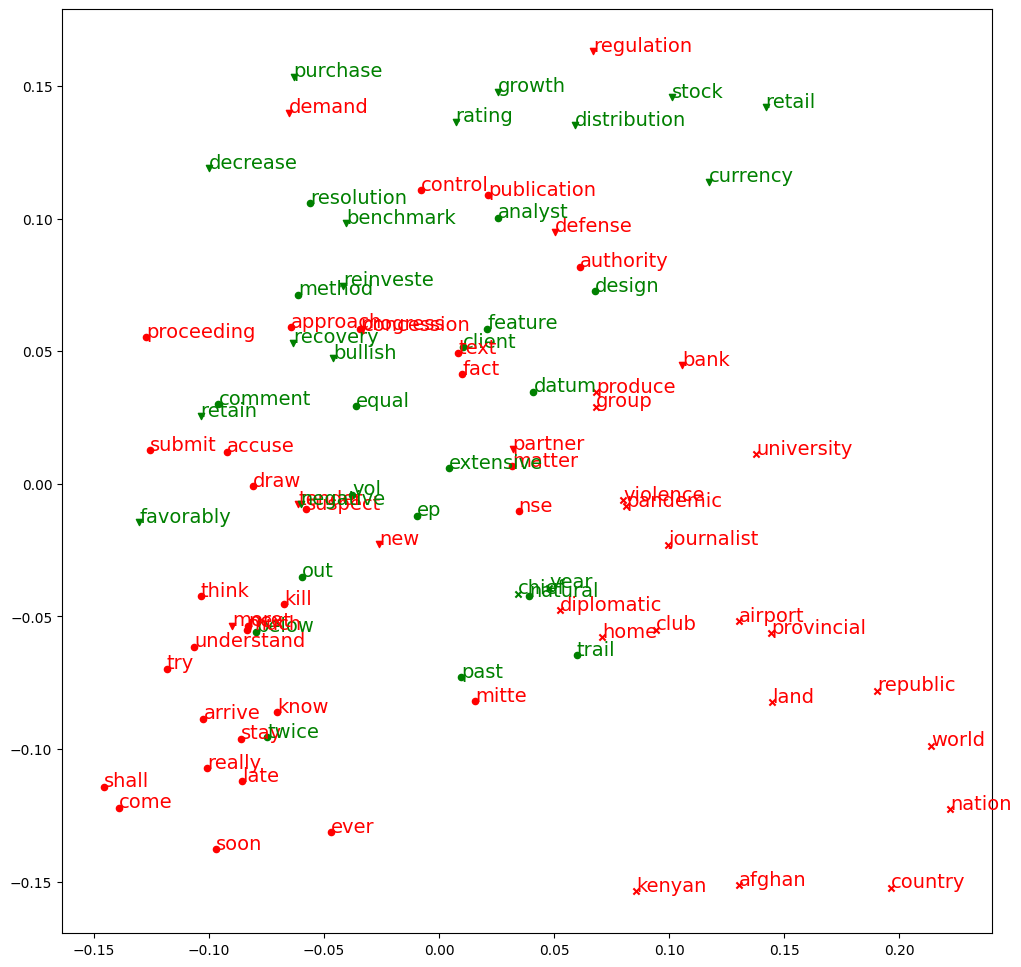

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings.detach().cpu().numpy())

# Create a scatter plot
plt.figure(figsize=(12, 12))

for i, word in enumerate(docs):
  #plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word, fontsize=7)
  marker = classify_word(word, cluster_dict)
  if word in non_peace_ls:
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word,c='r', fontsize=14)
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='r', s=20, marker= marker)
  else:
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word,c='g', fontsize=14)
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='g', s=20,marker = marker)


# Show the plot
plt.show()


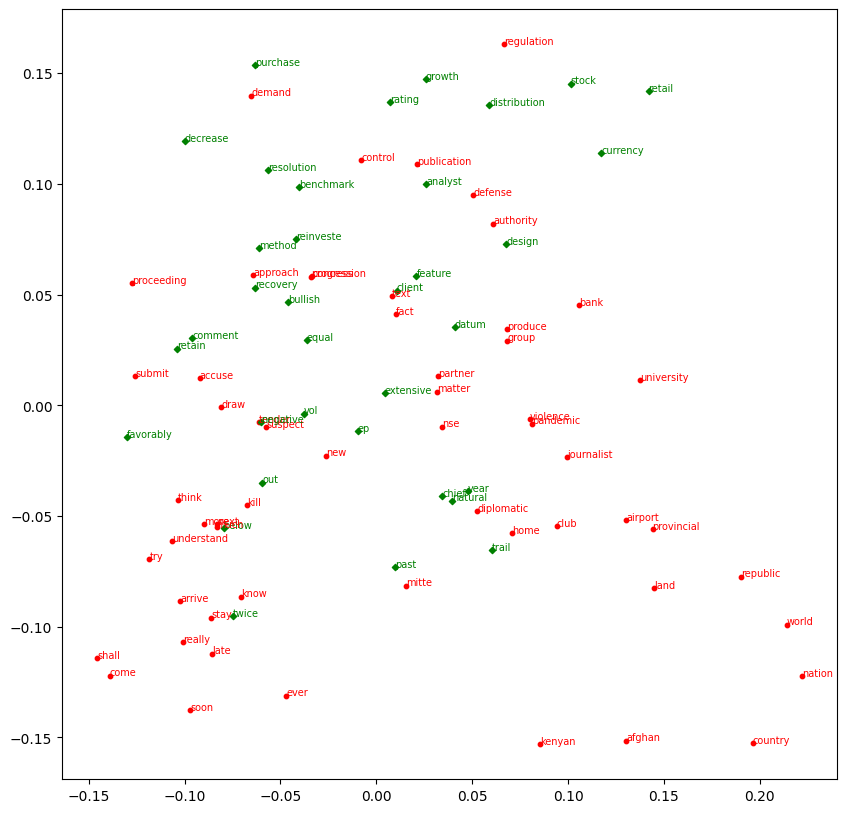

In [ ]:
# prompt: The above code is ok. Please make the font size and dots smaller so they don;t overlap each other.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings.detach().cpu().numpy())

# Create a scatter plot
plt.figure(figsize=(10, 10))

for i, word in enumerate(docs):
  #plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word, fontsize=7)
  if word in non_peace_ls:
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word,c='r', fontsize=7)
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='r', s=10)
  else:
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word,c='g', fontsize=7)
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='g', s=10)


# Show the plot
plt.show()


In [ ]:
def max1(peace,npeace):
  if peace >= npeace:
    return("Peace")
  else:
    return("Non Peace")

In [ ]:
def get_values(key,peace_ls,non_peace_ls,list1):
  peace = 1
  npeace = 1
  for i in list1:
    if i in peace_ls:
      peace = peace+1
    else:
      npeace = npeace+1

  peace = peace/len(peace_ls)
  npeace = npeace/len(non_peace_ls)

  return("{} Ratio is {} and winner is {}".format(key,peace/(npeace),max1(peace,npeace)))

In [ ]:
non_peace_ls = ['kill','afghan','tender','nation','concession','matter','fact','accuse','violence','draw','suspect','submit','proceeding','defense','ever','soon','club','nse','university','journalist','diplomatic','kenyan','progress','publication','provincial','mitte','airport','pandemic','understand','arrive','text','land','country','come','demand','authority','know','try','think','world','much','new','more','home','stay','next','group','bank','approach','partner','shall','produce','control','regulation','republic','late','really']
peace_ls = ['chief','recovery','out','design','equal','datum','negative','below','currency','trail','reinveste','growth','decrease','bullish','past','year','stock','benchmark','resolution','natural','feature','analyst','favorably','twice','client','distribution','retail','extensive','method','ep','retain','vol','comment','purchase','rating']

word_categories = {
    'business_finance': ['tender', 'benchmark', 'concession', 'submit', 'currency', 'reinvest', 'retain', 'distribution', 'retail', 'demand', 'purchase', 'stock', 'bullish', 'growth', 'analyst', 'bank', 'rating', 'partner'],
    'government_public': ['nation', 'diplomatic', 'defense', 'country', 'proceeding', 'regulation', 'republic', 'authority', 'provincial'],
    'legal_conflict': ['accuse', 'violence', 'suspect', 'kill', 'defense'],
    'analysis_decision': ['think', 'fact', 'matter', 'resolution', 'analysis', 'method', 'control', 'approach', 'understand', 'progress'],
    'communication_media': ['draw', 'group', 'comment', 'publication', 'journalist', 'text'],
    'education_knowledge': ['datum', 'university', 'know', 'learn'],
    'geopolitical': ['afghan', 'kenyan', 'nation', 'world', 'republic', 'country'],
    'personal_social': ['partner', 'chief', 'client', 'group', 'club'],
    'time_quantity': ['year', 'soon', 'ever', 'twice', 'more', 'much', 'next', 'late', 'past'],
    'health_wellbeing': ['recovery', 'negative', 'pandemic'],
    'travel_locations': ['trail', 'stay', 'home', 'airport', 'land'],
    'misc_actions_attributes': ['come', 'reinvest', 'decrease', 'stay', 'new', 'equal', 'natural', 'really', 'try', 'extensive', 'produce', 'arrive', 'out'],
    'tech_development': ['design', 'feature', 'method', 'progress'],
    'market_economics': ['demand', 'supply', 'market', 'retail', 'stock']
}

for i in word_categories.keys():
  print(get_values(i,peace_ls,non_peace_ls,word_categories[i]))



business_finance Ratio is 2.442857142857143 and winner is Peace
government_public Ratio is 0.16285714285714287 and winner is Non Peace
legal_conflict Ratio is 0.2714285714285714 and winner is Non Peace
analysis_decision Ratio is 0.5428571428571429 and winner is Non Peace
communication_media Ratio is 0.5428571428571428 and winner is Non Peace
education_knowledge Ratio is 0.8142857142857143 and winner is Non Peace
geopolitical Ratio is 0.2326530612244898 and winner is Non Peace
personal_social Ratio is 1.2214285714285715 and winner is Peace
time_quantity Ratio is 0.9306122448979592 and winner is Non Peace
health_wellbeing Ratio is 2.442857142857143 and winner is Peace
travel_locations Ratio is 0.6514285714285715 and winner is Non Peace
misc_actions_attributes Ratio is 1.0857142857142859 and winner is Peace
tech_development Ratio is 3.257142857142857 and winner is Peace
market_economics Ratio is 1.2214285714285715 and winner is Peace


In [ ]:
'government_public','legal_conflict','geopolitical','communication_media','analysis_decision'

In [ ]:
for j in ['government_public','legal_conflict','geopolitical','communication_media','analysis_decision']:
  print(j)
  print(', '.join([i for i in word_categories[j] if i in peace_ls]))
  print(', '.join([i for i in word_categories[j] if i in non_peace_ls]))
  if len([i for i in word_categories[j] if i in peace_ls]) == 0:
    print("All non peace")
  elif len([i for i in word_categories[j] if i in non_peace_ls]) == 0:
    print("All Peace")
  else:
    print((len([i for i in word_categories[j] if i in peace_ls])/len(peace_ls))/(len([i for i in word_categories[j] if i in non_peace_ls])/len(non_peace_ls)))


government_public

nation, diplomatic, defense, country, proceeding, regulation, republic, authority, provincial
All non peace
legal_conflict

accuse, violence, suspect, kill, defense
All non peace
geopolitical

afghan, kenyan, nation, world, republic, country
All non peace
communication_media
comment
draw, group, publication, journalist, text
0.32571428571428573
analysis_decision
resolution, method
think, fact, matter, control, approach, understand, progress
0.4653061224489796


In [ ]:
', '.join([i for i in cluster_dict[0] if i in peace_ls])
', '.join([i for i in cluster_dict[0] if i in non_peace_ls])
(len([i for i in cluster_dict[0] if i in peace_ls])/len(peace_ls))/(len([i for i in cluster_dict[0] if i in non_peace_ls])/len(non_peace_ls))

0.11764705882352941

In [ ]:
word_categories['business_finance']

['tender',
 'benchmark',
 'concession',
 'submit',
 'currency',
 'reinvest',
 'retain',
 'distribution',
 'retail',
 'demand',
 'purchase',
 'stock',
 'bullish',
 'growth',
 'analyst',
 'bank',
 'rating',
 'partner']

In [ ]:
peace_ls = ['ebit', 'aggregate', 'transaction', 'vwap', 'macd', 'bond', 'click', 'rating', 'undervalue', 'exceed', 'advt', 'analysis', 'minus', 'performer', 'oslobor', 'downtrend', 'parison', 'outperform', 'na', 'employ', 'tsr', 'vi', 'glossary', 'versus', 'overvaluation', 'undervaluation', 'convergence', 'size', 'ceo', 'divergence', 'unfavorably', 'underperform', 'conversion', 'exponential', 'fix', 'overbought', 'criterion', 'headline', 'purchase', 'comment', 'steep', 'gdp', 'length', 'annualize', 'bracket', 'acquisition', 'improvement', 'euro', 'equivalent', 'intangible']
non_peace_ls = ['constitution', 'iron', 'mining', 'kill', 'district', 'institution', 'corruption', 'peace', 'mine', 'graphite', 'block', 'governor', 'tender', 'opposition', 'ton', 'port', 'mission', 'arrest', 'presidential', 'effort', 'investigation', 'nation', 'concession', 'matter', 'military', 'fact', 'fight', 'infrastructure', 'request', 'obtain', 'death', 'war', 'adopt', 'lack', 'accuse', 'especially', 'secretary', 'violence', 'resident', 'lkr', 'yesterday', 'pursue', 'constitutional', 'protest', 'victory', 'youth', 'fail', 'grade', 'society', 'militant']
docs = peace_ls + non_peace_ls


In [ ]:
docs

['ebit',
 'aggregate',
 'transaction',
 'vwap',
 'macd',
 'bond',
 'click',
 'rating',
 'undervalue',
 'exceed',
 'advt',
 'analysis',
 'minus',
 'performer',
 'oslobor',
 'downtrend',
 'parison',
 'outperform',
 'na',
 'employ',
 'tsr',
 'vi',
 'glossary',
 'versus',
 'overvaluation',
 'undervaluation',
 'convergence',
 'size',
 'ceo',
 'divergence',
 'unfavorably',
 'underperform',
 'conversion',
 'exponential',
 'fix',
 'overbought',
 'criterion',
 'headline',
 'purchase',
 'comment',
 'steep',
 'gdp',
 'length',
 'annualize',
 'bracket',
 'acquisition',
 'improvement',
 'euro',
 'equivalent',
 'intangible',
 'constitution',
 'iron',
 'mining',
 'kill',
 'district',
 'institution',
 'corruption',
 'peace',
 'mine',
 'graphite',
 'block',
 'governor',
 'tender',
 'opposition',
 'ton',
 'port',
 'mission',
 'arrest',
 'presidential',
 'effort',
 'investigation',
 'nation',
 'concession',
 'matter',
 'military',
 'fact',
 'fight',
 'infrastructure',
 'request',
 'obtain',
 'death',
 'w

In [ ]:
embeddings = model.encode(docs, convert_to_tensor=True, normalize_embeddings=True)
print(embeddings)

tensor([[ 0.0107,  0.0204,  0.0009,  ..., -0.0266, -0.0487,  0.0321],
        [ 0.0377,  0.0274, -0.0214,  ...,  0.0112, -0.0486,  0.0401],
        [ 0.0439,  0.0356, -0.0145,  ..., -0.0268, -0.0443,  0.0262],
        ...,
        [ 0.0336,  0.0233, -0.0024,  ..., -0.0112, -0.0248,  0.0390],
        [ 0.0345,  0.0134, -0.0011,  ...,  0.0072, -0.0407,  0.0048],
        [ 0.0409,  0.0210, -0.0048,  ..., -0.0319, -0.0278,  0.0549]],
       device='cuda:0')


In [ ]:
num_clusters = 3

# Perform K-means clustering with the chosen number of clusters
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(embeddings.cpu().numpy())

# Print the cluster labels
print(km.labels_)

[1 1 1 1 1 1 1 2 2 2 1 1 2 0 1 2 1 2 1 1 1 1 1 1 2 2 1 1 0 1 2 2 1 1 1 2 1
 1 1 1 2 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 2 1 1 1 0 1 1 1 1 0 0 0 0 2 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# prompt: Please create a dictionary where the unique value of the clusters is the key and the corresponding word in the doc is the value

cluster_dict = {}
for i, label in enumerate(km.labels_):
  if label not in cluster_dict:
    cluster_dict[label] = []
  cluster_dict[label].append(docs[i])

print(cluster_dict)


{1: ['ebit', 'aggregate', 'transaction', 'vwap', 'macd', 'bond', 'click', 'advt', 'analysis', 'oslobor', 'parison', 'na', 'employ', 'tsr', 'vi', 'glossary', 'versus', 'convergence', 'size', 'divergence', 'conversion', 'exponential', 'fix', 'criterion', 'headline', 'purchase', 'comment', 'length', 'annualize', 'bracket', 'acquisition', 'improvement', 'euro', 'equivalent', 'intangible', 'iron', 'mining', 'kill', 'district', 'institution', 'mine', 'graphite', 'block', 'tender', 'ton', 'port', 'mission', 'arrest', 'effort', 'investigation', 'concession', 'matter', 'fact', 'infrastructure', 'request', 'obtain', 'death', 'adopt', 'accuse', 'especially', 'secretary', 'resident', 'lkr', 'yesterday', 'pursue', 'grade'], 2: ['rating', 'undervalue', 'exceed', 'minus', 'downtrend', 'outperform', 'overvaluation', 'undervaluation', 'unfavorably', 'underperform', 'overbought', 'steep', 'gdp', 'lack', 'fail'], 0: ['performer', 'ceo', 'constitution', 'corruption', 'peace', 'governor', 'opposition', 'pr

In [ ]:
', '.join([i for i in cluster_dict[2] if i in peace_ls])

'rating, undervalue, exceed, minus, downtrend, outperform, overvaluation, undervaluation, unfavorably, underperform, overbought, steep, gdp'

In [ ]:
', '.join([i for i in cluster_dict[2] if i in non_peace_ls])

'lack, fail'

In [ ]:
(len([i for i in cluster_dict[1] if i in peace_ls])/len(peace_ls))/(len([i for i in cluster_dict[1] if i in non_peace_ls])/len(non_peace_ls))

1.129032258064516

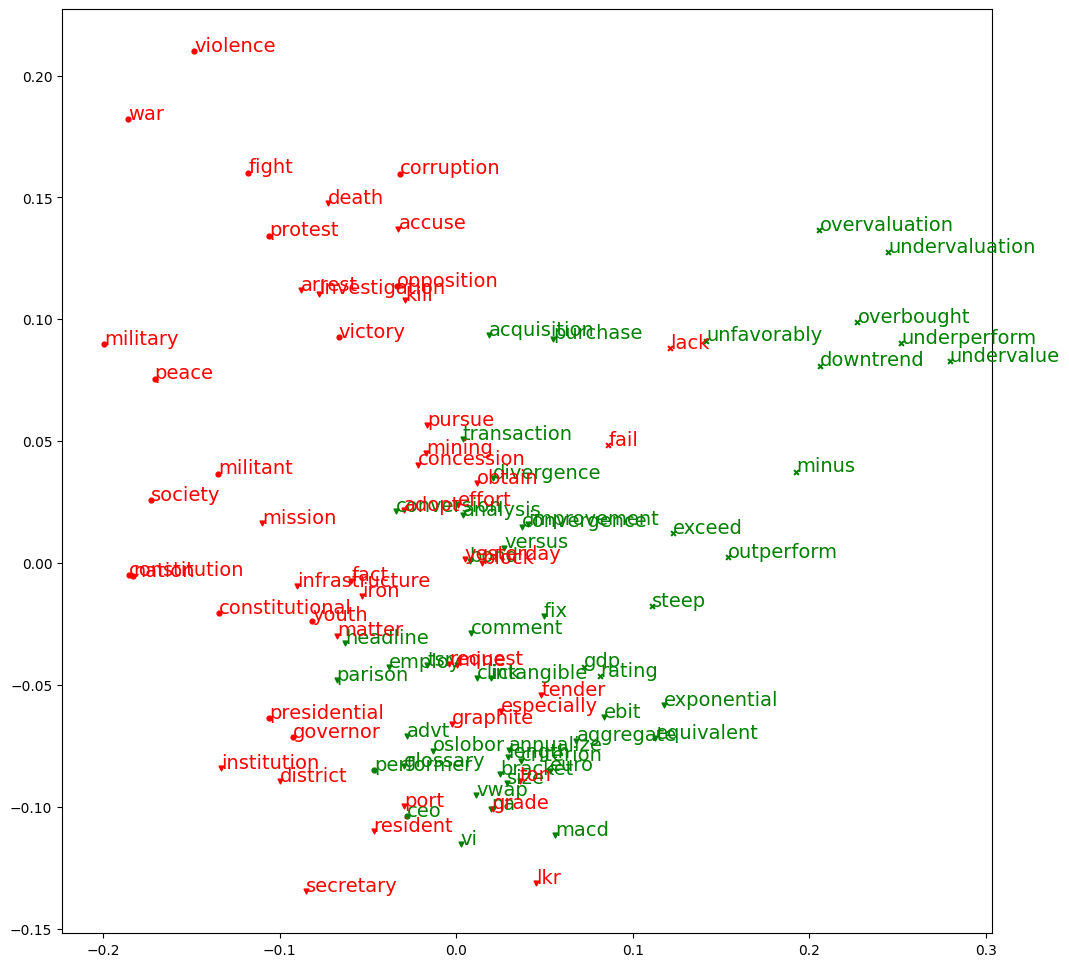

In [ ]:
# prompt: The above code is ok. Please make the font size and dots smaller so they don;t overlap each other.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings.detach().cpu().numpy())

# Create a scatter plot
plt.figure(figsize=(12, 12))

# Label the points with the corresponding words
for i, word in enumerate(docs):
  marker = classify_word(word, cluster_dict)
  if word in non_peace_ls:
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word,c='r', fontsize=14)
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='r', s=12,marker=marker)
  else:
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word, c='g', fontsize=14)
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c='g', s=12,marker=marker)


# Show the plot
plt.show()


In [ ]:
docs

['ebit',
 'aggregate',
 'transaction',
 'vwap',
 'macd',
 'bond',
 'click',
 'rating',
 'undervalue',
 'exceed',
 'advt',
 'analysis',
 'minus',
 'performer',
 'oslobor',
 'downtrend',
 'parison',
 'outperform',
 'na',
 'employ',
 'tsr',
 'vi',
 'glossary',
 'versus',
 'overvaluation',
 'undervaluation',
 'convergence',
 'size',
 'ceo',
 'divergence',
 'unfavorably',
 'underperform',
 'conversion',
 'exponential',
 'fix',
 'overbought',
 'criterion',
 'headline',
 'purchase',
 'comment',
 'steep',
 'gdp',
 'length',
 'annualize',
 'bracket',
 'acquisition',
 'improvement',
 'euro',
 'equivalent',
 'intangible',
 'constitution',
 'iron',
 'mining',
 'kill',
 'district',
 'institution',
 'corruption',
 'peace',
 'mine',
 'graphite',
 'block',
 'governor',
 'tender',
 'opposition',
 'ton',
 'port',
 'mission',
 'arrest',
 'presidential',
 'effort',
 'investigation',
 'nation',
 'concession',
 'matter',
 'military',
 'fact',
 'fight',
 'infrastructure',
 'request',
 'obtain',
 'death',
 'w

In [ ]:
peace_ls = ['ebit', 'aggregate', 'transaction', 'vwap', 'macd', 'bond', 'click', 'rating', 'undervalue', 'exceed', 'advt', 'analysis', 'minus', 'performer', 'oslobor', 'downtrend', 'parison', 'outperform', 'na', 'employ', 'tsr', 'vi', 'glossary', 'versus', 'overvaluation', 'undervaluation', 'convergence', 'size', 'ceo', 'divergence', 'unfavorably', 'underperform', 'conversion', 'exponential', 'fix', 'overbought', 'criterion', 'headline', 'purchase', 'comment', 'steep', 'gdp', 'length', 'annualize', 'bracket', 'acquisition', 'improvement', 'euro', 'equivalent', 'intangible']
non_peace_ls = ['constitution', 'iron', 'mining', 'kill', 'district', 'institution', 'corruption', 'peace', 'mine', 'graphite', 'block', 'governor', 'tender', 'opposition', 'ton', 'port', 'mission', 'arrest', 'presidential', 'effort', 'investigation', 'nation', 'concession', 'matter', 'military', 'fact', 'fight', 'infrastructure', 'request', 'obtain', 'death', 'war', 'adopt', 'lack', 'accuse', 'especially', 'secretary', 'violence', 'resident', 'lkr', 'yesterday', 'pursue', 'constitutional', 'protest', 'victory', 'youth', 'fail', 'grade', 'society', 'militant']

finer_semantic_groups = {
    "Financial Metrics and Ratios": [
        "ebit", "vwap", "advt", "tsr"
    ],
    "Market Analysis": [
        "aggregate", "analysis", "overvaluation", "undervaluation", "convergence", "divergence", "steep", "glossary"
    ],
    "Investment Strategies": [
        "macd", "downtrend", "outperform", "underperform", "overbought"
    ],
    "Corporate Finance": [
        "transaction", "bond", "rating", "purchase", "acquisition", "improvement"
    ],
    "Valuation": [
        "undervalue", "exceed", "equivalent", "intangible"
    ],
    "Trading Indicators": [
        "parison", "conversion", "exponential"
    ],
    "Economic Indicators": [
        "gdp", "inflation", "unemployment"
    ],
    "Governance and Leadership": [
        "ceo", "governor", "secretary"
    ],
    "Legal and Governance": [
        "constitution", "legislation", "regulation", "compliance"
    ],
    "Political and Social Issues": [
        "peace", "opposition", "arrest", "presidential", "effort", "nation", "military", "fight", "death", "war",
        "violence", "investigation", "protest", "victory", "youth", "fail", "society", "militant"
    ],
    "Mining and Natural Resources": [
        "iron", "mining", "mine", "graphite", "block", "ton", "port"
    ],
    "Corporate and Organizational": [
        "institution", "corruption", "effort", "mission"
    ],
    "Legal Processes": [
        "arrest", "investigation", "accuse", "trial"
    ],
    "Political Processes": [
        "election", "presidential", "constitutional", "protest"
    ],
    "Miscellaneous Financial": [
        "click", "rating", "headline", "comment", "grade", "lkr"
    ],
    "Miscellaneous": [
        "employ", "resident", "yesterday", "pursue", "criterion", "size", "length", "annualize", "bracket"
    ]
}



In [ ]:
for i in finer_semantic_groups.keys():
  print(get_values(i,peace_ls,non_peace_ls,finer_semantic_groups[i]))

Financial Metrics and Ratios Ratio is 5.0 and winner is Peace
Market Analysis Ratio is 9.0 and winner is Peace
Investment Strategies Ratio is 6.0 and winner is Peace
Corporate Finance Ratio is 7.000000000000001 and winner is Peace
Valuation Ratio is 5.0 and winner is Peace
Trading Indicators Ratio is 4.0 and winner is Peace
Economic Indicators Ratio is 0.6666666666666667 and winner is Non Peace
Governance and Leadership Ratio is 0.6666666666666667 and winner is Non Peace
Legal and Governance Ratio is 0.19999999999999998 and winner is Non Peace
Political and Social Issues Ratio is 0.05263157894736842 and winner is Non Peace
Mining and Natural Resources Ratio is 0.125 and winner is Non Peace
Corporate and Organizational Ratio is 0.19999999999999998 and winner is Non Peace
Legal Processes Ratio is 0.19999999999999998 and winner is Non Peace
Political Processes Ratio is 0.19999999999999998 and winner is Non Peace
Miscellaneous Financial Ratio is 1.6666666666666667 and winner is Peace
Misce

In [ ]:
for j in ['Political and Social Issues','Mining and Natural Resources','Governance and Leadership','Legal Processes']:
  print(j)
  print(', '.join([i for i in finer_semantic_groups[j] if i in peace_ls]))
  print(', '.join([i for i in finer_semantic_groups[j] if i in non_peace_ls]))
  if len([i for i in finer_semantic_groups[j] if i in peace_ls]) == 0:
    print("All non peace")
  elif len([i for i in finer_semantic_groups[j] if i in non_peace_ls]) == 0:
    print("All Peace")
  else:
    print((len([i for i in finer_semantic_groups[j] if i in peace_ls])/len(peace_ls))/(len([i for i in finer_semantic_groups[j] if i in non_peace_ls])/len(non_peace_ls)))


Political and Social Issues

peace, opposition, arrest, presidential, effort, nation, military, fight, death, war, violence, investigation, protest, victory, youth, fail, society, militant
All non peace
Mining and Natural Resources

iron, mining, mine, graphite, block, ton, port
All non peace
Governance and Leadership
ceo
governor, secretary
0.5
Legal Processes

arrest, investigation, accuse
All non peace


In [ ]:
semantic_groups = {
    "Financial Terms": [
        "ebit", "aggregate", "transaction", "vwap", "bond", "rating", "undervalue", "exceed", "advt", "analysis",
        "performer", "oslobor", "parison", "outperform", "na", "employ", "tsr", "vi", "glossary", "versus",
        "overvaluation", "undervaluation", "size", "ceo", "conversion", "exponential", "overbought", "criterion",
        "purchase", "annualize", "bracket", "acquisition", "improvement", "euro", "equivalent", "intangible",
        "constitution", "gdp", "fix", "headline", "comment", "iron", "mining", "block", "ton", "port", "investigation",
        "concession", "infrastructure", "mission", "grade", "lkr"
    ],
    "Trading Indicators": [
        "macd", "downtrend", "convergence", "divergence", "underperform", "steep"
    ],
    "Corporate and Employment": [
        "click", "employ", "ceo", "institution", "employ", "governor", "secretary", "resident"
    ],
    "Market Conditions": [
        "minus", "unfavorably", "overvaluation", "undervaluation"
    ],
    "Quantitative Metrics": [
        "size", "length", "conversion"
    ],
    "Legal and Governance": [
        "constitution", "corruption", "peace", "tender", "opposition", "arrest", "presidential", "effort",
        "nation", "matter", "military", "fact", "fight", "request", "obtain", "death", "war", "adopt", "lack",
        "accuse", "especially", "violence", "yesterday", "pursue", "constitutional", "protest", "victory", "youth",
        "fail", "society", "militant", "investigation", "mission"
    ],
    "Miscellaneous": [
        "kill", "district", "mine", "graphite", "fact", "obtain", "especially", "secretary", "resident", "yesterday",
        "pursue", "youth"
    ]
}


In [ ]:
for i in semantic_groups.keys():
  print(get_values(i,peace_ls,non_peace_ls,semantic_groups[i]))

Financial Terms Ratio is 3.1538461538461537 and winner is Peace
Trading Indicators Ratio is 7.000000000000001 and winner is Peace
Corporate and Employment Ratio is 1.0 and winner is Peace
Market Conditions Ratio is 5.0 and winner is Peace
Quantitative Metrics Ratio is 4.0 and winner is Peace
Legal and Governance Ratio is 0.029411764705882353 and winner is Non Peace
Miscellaneous Ratio is 0.07692307692307693 and winner is Non Peace


In [ ]:
refined_semantic_groups = {
    "Finance and Markets": [
        "ebit", "aggregate", "transaction", "vwap", "bond", "rating", "undervalue", "exceed", "advt", "analysis",
        "performer", "oslobor", "parison", "outperform", "tsr", "vi", "glossary", "versus", "overvaluation",
        "undervaluation", "conversion", "exponential", "overbought", "purchase", "annualize", "bracket",
        "acquisition", "improvement", "euro", "equivalent", "intangible", "gdp", "fix", "headline", "comment",
        "grade", "lkr"
    ],
    "Trading and Investment": [
        "macd", "downtrend", "convergence", "divergence", "underperform", "steep"
    ],
    "Corporate Structure": [
        "ceo", "institution", "corruption", "governor", "secretary"
    ],
    "Market Analysis": [
        "minus", "unfavorably", "size", "length"
    ],
    "Legal and Political": [
        "constitution", "peace", "tender", "opposition", "arrest", "presidential", "effort", "nation", "matter",
        "military", "fact", "fight", "request", "obtain", "death", "war", "adopt", "lack", "accuse", "especially",
        "violence", "investigation", "concession", "infrastructure", "mission", "constitutional", "protest",
        "victory", "youth", "fail", "society", "militant"
    ],
    "Mining and Resources": [
        "iron", "mining", "mine", "graphite", "block", "ton", "port"
    ],
    "Miscellaneous": [
        "click", "employ", "resident", "yesterday", "pursue", "criterion"
    ]
}


In [ ]:
for i in refined_semantic_groups.keys():
  print(get_values(i,peace_ls,non_peace_ls,refined_semantic_groups[i]))

Finance and Markets Ratio is 12.0 and winner is Peace
Trading and Investment Ratio is 7.000000000000001 and winner is Peace
Corporate Structure Ratio is 0.39999999999999997 and winner is Non Peace
Market Analysis Ratio is 5.0 and winner is Peace
Legal and Political Ratio is 0.030303030303030304 and winner is Non Peace
Mining and Resources Ratio is 0.125 and winner is Non Peace
Miscellaneous Ratio is 1.0 and winner is Peace
